In [13]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

# Cleaning the data

In [ ]:
import glob
from data_cleaning import clean_nse_csv

DATA_PATH = "data/*.csv"

all_files = glob.glob(DATA_PATH)

cleaned_dfs = []

for file in all_files:
    symbol = file.split("/")[-1].split("_")[0]

    df = clean_nse_csv(file, symbol)
    cleaned_dfs.append(df)
final_df = pd.concat(cleaned_dfs, ignore_index=True)

In [ ]:
import glob
from data_cleaning import clean_nse_csv

DATA_PATH = "data/*.csv"

all_files = glob.glob(DATA_PATH)

cleaned_dfs = []

for file in all_files:
    symbol = file.split("/")[-1].split("_")[0]

    df = clean_nse_csv(file, symbol)
    cleaned_dfs.append(df)
final_df = pd.concat(cleaned_dfs, ignore_index=True)

## Saving master file containing all the data

In [7]:
final_df.to_csv("cleaned_nse_data.csv", index=False)

# Exploratory Data Analysis

In [8]:
df = pd.read_csv(
    "cleaned_nse_data.csv",
    parse_dates=["trade_date"]
)

df = df.sort_values("trade_date").reset_index(drop=True)

In [ ]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         5208 non-null   object        
 1   trade_date     5208 non-null   datetime64[ns]
 2   open           5208 non-null   float64       
 3   high           5208 non-null   float64       
 4   low            5208 non-null   float64       
 5   close          5208 non-null   float64       
 6   shares_traded  5208 non-null   int64         
 7   turnover_cr    5208 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 325.6+ KB


,symbol,trade_date,open,high,low,close,shares_traded,turnover_cr
5203,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-24,26170.65,26236.40,26123.0,26142.10,188846828,17474.44
5204,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-26,26121.25,26144.20,26008.6,26042.30,142243763,12263.06
5205,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-29,26063.35,26106.80,25920.3,25942.10,234312888,18184.45
5206,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-30,25940.90,25976.75,25878.0,25938.85,396893959,39492.31
5207,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-31,25971.05,26187.95,25969.0,26129.60,246314941,20703.99


In [10]:
date_diff = df['trade_date'].diff().value_counts()
date_diff.head()

trade_date
1 days    3958
3 days     965
2 days     167
4 days     106
5 days      10
Name: count, dtype: int64

Data is relatively continuous. 

## Close Price

In stock market data, the close price (or closing price) is the last price at which a stock or asset is traded during a regular trading session for that day. It’s considered the official price of the stock at the end of the trading day.

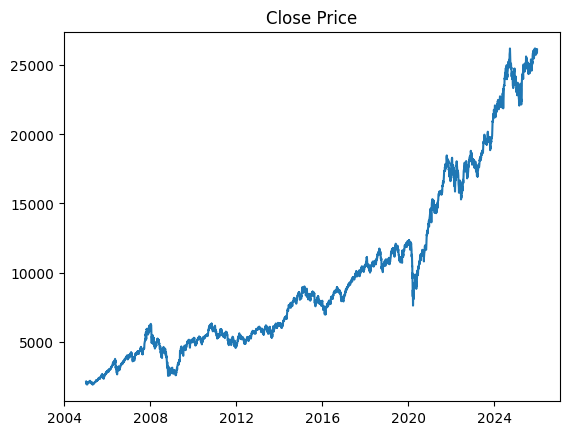

In [12]:
plt.figure()
plt.plot(df['trade_date'], df['close'])
plt.title("Close Price")
plt.show()

### Analysis

#### 1. Long-term Trend
- The overall trajectory shows a strong upward trend over 20 years.
- Despite periodic dips, the market has generally increased, reflecting long-term growth in the Indian stock market.

#### 2. Major Market Corrections / Crashes
- **2008–2009**: Sharp drop during the global financial crisis, followed by recovery in subsequent years.
- **2020**: Significant dip corresponding to the COVID-19 market crash, followed by a rapid recovery.

#### 3. Volatility
- Short-term fluctuations are present throughout the period.
- Higher volatility is noticeable during crisis periods.
- Post-2020, the market exhibits sharper movements, indicating higher liquidity or speculative trading.

#### 4. Recovery Patterns
- After each major dip, the market recovers and often reaches higher peaks than before.
- Shows resilience and sustained positive investor sentiment over the long term.

#### 5. Compound Growth
- Market grew from ~2,000 in 2005 to over 25,000 in 2025 (~12–13x increase).
- Roughly translates to a 12–15% annualized return (excluding dividends).

#### 6. Investment Insights
- Long-term investments would have benefited from holding through volatility.
- Short-term trading during volatile periods is riskier but can offer gains if timed correctly.


## Daily Log Returns 

Daily log returns are a measure of an asset's price change over a single day, calculated as the natural logarithm of the ratio of the closing price to the previous day's closing price.  The formula is:

$ r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1}) $

Where:
 - $\ln $ = natural logarithm 
 - $ P_t $  = closing price today
 - $ P_{t-1} $ = closing price yesterday



In [14]:
df['log_return'] = np.log(df['close']).diff()
df['log_return'].describe()

count    5207.000000
mean        0.000483
std         0.013139
min        -0.139038
25%        -0.005187
50%         0.000791
75%         0.006822
max         0.163343
Name: log_return, dtype: float64

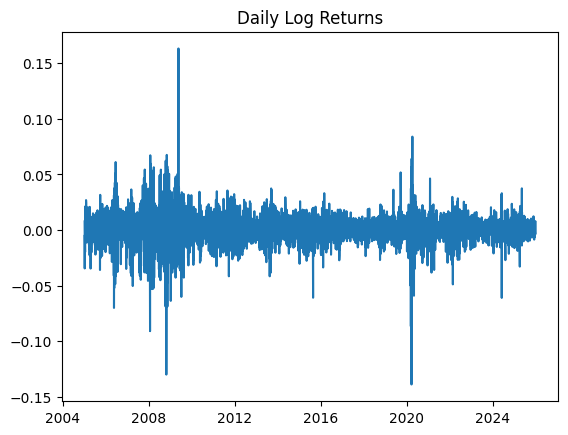

In [15]:
plt.figure()
plt.plot(df['trade_date'], df['log_return'])
plt.title("Daily Log Returns")
plt.show()

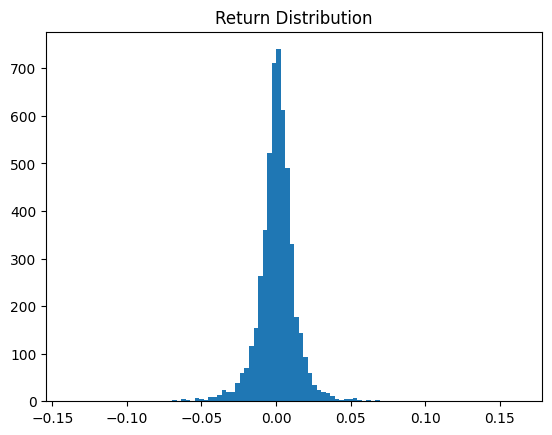

In [16]:
plt.figure()
plt.hist(df['log_return'].dropna(), bins=100)
plt.title("Return Distribution")
plt.show()
